### Searching for LSBs / UDGs in a region

I choose a region $1^o \times 1^o$, apply some cuts and find LSB / UDG candidates. 

I check how each one of the cuts reduces the number of candidates. In principle I can even make plots to show how the number of candidates change (and true/false positives? - this would be interesting but difficult) as we vary the threshold of the cuts.

 - Third Region, around the center of the Fornax cluster:
 
The third region I select is:
\begin{equation}
54.11625 \leq \mbox{RA} \leq 55.11625\\
-35.94833 \leq \mbox{DEC} \leq -34.94833 
\end{equation}
 
 

In [122]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import skymapper as skm
from code.plot_utils import plot_pretty
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

%matplotlib inline
%pylab inline 
plot_pretty() 

Populating the interactive namespace from numpy and matplotlib


Import the DES data for the above region now:

In [123]:
REG_3 = fits.open('Region_3.fits')
print REG_3[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  104 / length of dimension 1                          
NAXIS2  =                41340 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   24 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '                                                            

###### Import the data now

In [124]:
# Import everything 
# ========================================================
# ========================================================
# spread_model_i and its error
spread_model_i = REG_3[1].data['spread_model_i']
speraderr_model_i = REG_3[1].data['spreaderr_model_i']

# RA and DEC 
RA = REG_3[1].data['ra']
DEC = REG_3[1].data['dec']

# Image A/ Image B
IMAGE_A = REG_3[1].data['a_image']
IMAGE_B = REG_3[1].data['b_image']

# Magnitudes 
MAG_AUTO_G = REG_3[1].data['mag_auto_g']
MAG_AUTO_R = REG_3[1].data['mag_auto_r']
MAG_AUTO_I = REG_3[1].data['mag_auto_i']

# Flux radii - convert from pixels to arcseconds
FLUX_RADIUS_G = 0.263*REG_3[1].data['flux_radius_g']
FLUX_RADIUS_R = 0.263*REG_3[1].data['flux_radius_r']
FLUX_RADIUS_I = 0.263*REG_3[1].data['flux_radius_i'] 

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G = REG_3[1].data['mu_eff_model_g']
MU_EFF_R = REG_3[1].data['mu_eff_model_r']
MU_EFF_I = REG_3[1].data['mu_eff_model_i']

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G = REG_3[1].data['mu_max_g']
MU_MAX_R = REG_3[1].data['mu_max_r']
MU_MAX_I = REG_3[1].data['mu_max_i']

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G = REG_3[1].data['mu_max_model_g']
MU_MAX_MODEL_R = REG_3[1].data['mu_max_model_r']
MU_MAX_MODEL_I = REG_3[1].data['mu_max_model_i']

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G = REG_3[1].data['mu_mean_model_g']
MU_MEAN_R = REG_3[1].data['mu_mean_model_r']
MU_MEAN_I = REG_3[1].data['mu_mean_model_i']


print(len(RA))

41340


First cut: star-galaxy separation.

For that, I perform the cut:

\begin{equation}
spread\_model\_i + (5/3)spreaderr\_model\_i > 0.007
\end{equation}

(to keep only galaxies)

In [125]:
# Define the cut first
star_gal_cut = ((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)

# Perform the cut now
# =====================================================================
# =====================================================================

# RA and DEC
RA = RA[star_gal_cut]
DEC = DEC[star_gal_cut]

# Image A/ Image B
IMAGE_A = IMAGE_A[star_gal_cut]
IMAGE_B = IMAGE_B[star_gal_cut]

#Magnitudes 
MAG_AUTO_G = MAG_AUTO_G[star_gal_cut]
MAG_AUTO_R = MAG_AUTO_R[star_gal_cut]
MAG_AUTO_I = MAG_AUTO_I[star_gal_cut]

#Flux radii 
FLUX_RADIUS_G = FLUX_RADIUS_G[star_gal_cut]
FLUX_RADIUS_R = FLUX_RADIUS_R[star_gal_cut]
FLUX_RADIUS_I = FLUX_RADIUS_I[star_gal_cut]

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G = MU_EFF_G[star_gal_cut]
MU_EFF_R = MU_EFF_R[star_gal_cut]
MU_EFF_I = MU_EFF_I[star_gal_cut]

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G = MU_MAX_G[star_gal_cut]
MU_MAX_R = MU_MAX_R[star_gal_cut]
MU_MAX_I = MU_MAX_I[star_gal_cut]

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G = MU_MAX_MODEL_G[star_gal_cut]
MU_MAX_MODEL_R = MU_MAX_MODEL_R[star_gal_cut]
MU_MAX_MODEL_I = MU_MAX_MODEL_I[star_gal_cut]

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G = MU_MEAN_G[star_gal_cut]
MU_MEAN_R = MU_MEAN_R[star_gal_cut]
MU_MEAN_I = MU_MEAN_I[star_gal_cut]


print(len(RA))

32422


#### First cut: Surface brightness

The first cut we are going to perform is a cut w/r to the surface brightness, of the form: 

\begin{equation} 
\bar{\mu}_{eff}(g) > \alpha \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}

where $\bar{\mu}_{eff}(g)$ the g-band surface brightness with their circularized effective radii (the SExtractor mu_eff_model_g).

In Greco et al. it is adopted the number $\alpha = 24.3$. 

Another possible cut is in the peak central surface brightness ($g$ magnitude), $\mu_0(g)$. UDGs have:

\begin{equation}
\mu_0(g) \gtrsim 24 \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}

Generally, a cut of the form:

\begin{equation}
\mu_0(g) > \beta \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}

(The SExtractor 'mu_max_g' parameter)

In Greco paper it is adopted $\beta = 23.5$ (equivalent to the above $\alpha = 24.3$ they claim).

Here we will first explore how the sample size reduces as a function of the cut threshold for the two above possible cuts.

Then we will adopt the Greco cut and proceed.


- First: Sample size as a function of $\bar{\mu}_{eff}(g)$. We use a range $\alpha \in [23,25]$

- Second: Sample size as a function of $\mu_0(g)$. We use again a range of $\beta \in [23,25]$


In [126]:
# Range in alpha
alpha = np.linspace(23.0, 25.0, 100)
al_size = len(alpha) #Its size - it can change

# ===============================================================
# Initialize- an array to get the sample size after the cut
sample_size_eff = np.zeros(al_size)
sample_size_max = np.zeros(al_size)

for i in range(al_size):
    # Define the cut
    mu_eff_cut = (MU_EFF_G > alpha[i])
    RA_temp_cut = RA[mu_eff_cut]
    
    mu_max_cut = (MU_MAX_G > alpha[i])
    
    RA_temp_2_cut = RA[mu_max_cut]
    
    
    sample_size_eff[i] = len(RA_temp_cut)
    sample_size_max[i] = len(RA_temp_2_cut)
    

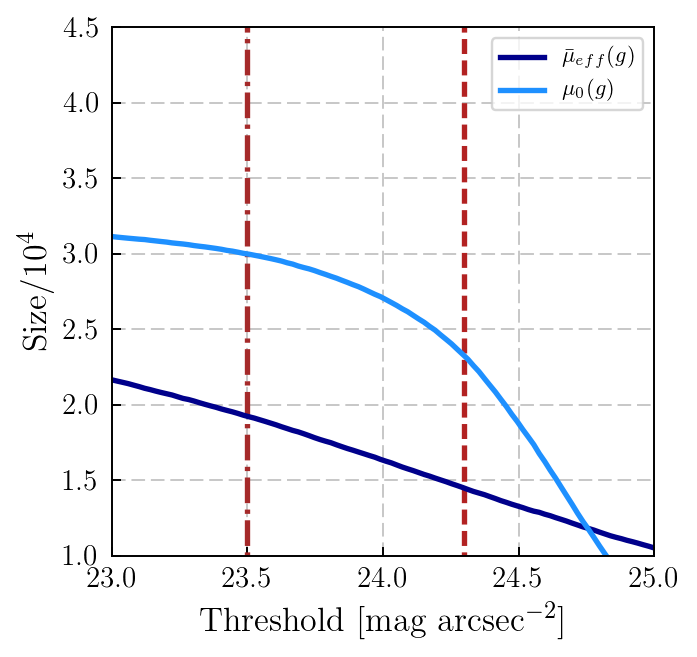

In [127]:
fig = plt.figure(figsize=(4.0,4.0))


plt.plot(alpha, sample_size_eff/1.0e4, color ='darkblue', linewidth = 2.2, label=r'$\bar{\mu}_{eff}(g)$' )
plt.plot(alpha, sample_size_max/1.0e4, color ='dodgerblue', linewidth = 2.2, label=r'$\mu_0(g)$' )
plt.grid(ls='--', alpha=0.7)

plt.vlines(24.3,0.5,5, color='firebrick', linestyle='--', linewidth= 2.2)
plt.vlines(23.5,0.5,5, color='brown', linestyle='-.', linewidth= 2.2)


plt.tick_params(axis='both', labelsize=12)
plt.xlim(23.0,25.0);plt.ylim(1,4.5)

plt.ylabel('Size$/10^4$',fontsize=14)
plt.xlabel('Threshold [mag arcsec$^{-2}$]',fontsize=14)

plt.legend(frameon=True, loc='upper right', fontsize=9)
plt.show()

Actually, lets repeat the above plot for all types of magnitudes

In [128]:
# ============================================================
# Initialize- an array to get the sample size after the cut
sample_size_eff = np.zeros(al_size)
sample_size_max = np.zeros(al_size)
sample_size_max_model = np.zeros(al_size)
sample_size_mean = np.zeros(al_size)
# ============================================================
# ============================================================
for i in range(al_size):
    # Define the cuts
    mu_eff_cut = (MU_EFF_G > alpha[i])
    mu_max_cut = (MU_MAX_G > alpha[i])
    mu_max_model_cut = (MU_MAX_MODEL_G > alpha[i])
    mu_mean_model_cut = (MU_MEAN_G > alpha[i])
     
    RA_eff_cut = RA[mu_eff_cut]
    RA_max_cut = RA[mu_max_cut]
    RA_max_model_cut = RA[mu_max_model_cut]
    RA_mean_model_cut = RA[mu_mean_model_cut]
    
    sample_size_eff[i] = len(RA_eff_cut)
    sample_size_max[i] = len(RA_max_cut)
    sample_size_max_model[i] = len(RA_max_model_cut)
    sample_size_mean[i] = len(RA_mean_model_cut)
    

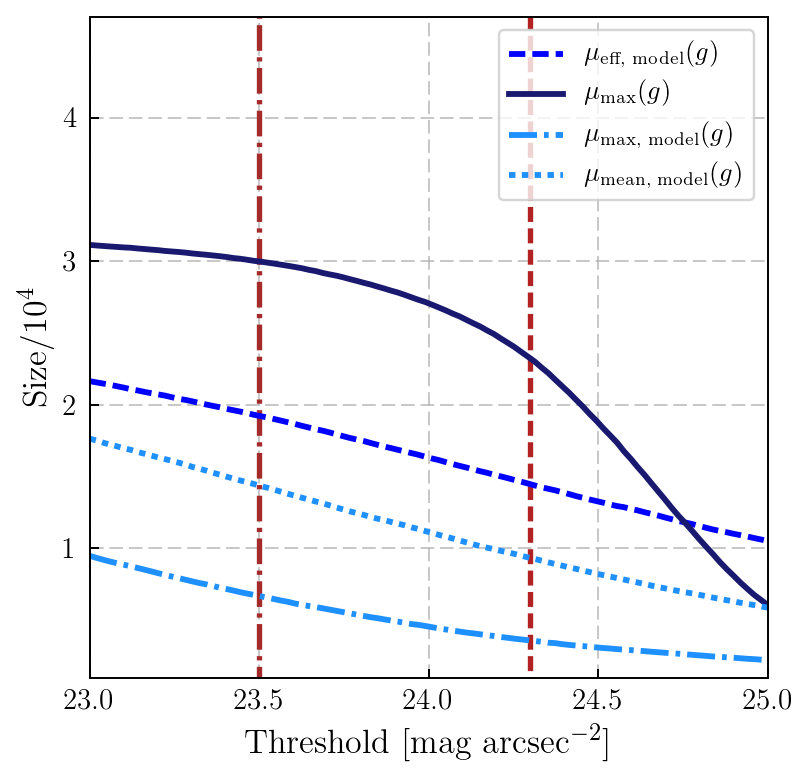

In [129]:
fig = plt.figure(figsize=(5.0,5.0))

plt.plot(alpha, sample_size_eff/1e4, c='blue', ls ='--', linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{eff, model}}}(g)$')
plt.plot(alpha, sample_size_max/1e4, c='midnightblue',linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{max}}}(g)$')
plt.plot(alpha, sample_size_max_model/1e4, c='dodgerblue',ls ='-.', linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{max, model}}}(g)$')
plt.plot(alpha, sample_size_mean/1e4,c='dodgerblue',ls =':', linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{mean, model}}}(g)$')
plt.grid(ls='--', alpha=0.7)

# =============================================================
# =============================================================
plt.vlines(24.3,0.0,5, color='firebrick', linestyle='--', linewidth= 2.2)
plt.vlines(23.5,0.0,5, color='brown', linestyle='-.', linewidth= 2.2)

# =============================================================
# =============================================================
plt.ylabel('Size$/10^4$',fontsize=14)
plt.xlabel('Threshold [mag arcsec$^{-2}$]',fontsize=14)
# =============================================================
# =============================================================

plt.legend(frameon=True, loc='upper right', fontsize=11)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(23.0,25.0);plt.ylim(0.1,4.7)
plt.show()

We see that the $\mu_{max}(g)$ presents a qualitatively different behavior compared to the other three quantities (that use the effective model).

Here I will adopt and perform the cut:

\begin{equation} 
\bar{\mu}_{eff}(g) > 24.3 \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}



In [130]:
# Define the cut first
# =============================================
mu_eff_cut = (MU_EFF_G > 24.3)
# =============================================
# =============================================

# Perform the cut now
# =====================================================================
# =====================================================================

# RA and DEC
RA_1 = RA[mu_eff_cut]
DEC_1 = DEC[mu_eff_cut]

# Image A/ Image B
IMAGE_A_1 = IMAGE_A[mu_eff_cut]
IMAGE_B_1 = IMAGE_B[mu_eff_cut]

#Magnitudes 
MAG_AUTO_G_1 = MAG_AUTO_G[mu_eff_cut]
MAG_AUTO_R_1 = MAG_AUTO_R[mu_eff_cut]
MAG_AUTO_I_1 = MAG_AUTO_I[mu_eff_cut]

#Flux radii 
FLUX_RADIUS_G_1 = FLUX_RADIUS_G[mu_eff_cut]
FLUX_RADIUS_R_1 = FLUX_RADIUS_R[mu_eff_cut]
FLUX_RADIUS_I_1 = FLUX_RADIUS_I[mu_eff_cut]

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G_1 = MU_EFF_G[mu_eff_cut]
MU_EFF_R_1 = MU_EFF_R[mu_eff_cut]
MU_EFF_I_1 = MU_EFF_I[mu_eff_cut]

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G_1 = MU_MAX_G[mu_eff_cut]
MU_MAX_R_1 = MU_MAX_R[mu_eff_cut]
MU_MAX_I_1 = MU_MAX_I[mu_eff_cut]

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G_1 = MU_MAX_MODEL_G[mu_eff_cut]
MU_MAX_MODEL_R_1 = MU_MAX_MODEL_R[mu_eff_cut]
MU_MAX_MODEL_I_1 = MU_MAX_MODEL_I[mu_eff_cut]

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G_1 = MU_MEAN_G[mu_eff_cut]
MU_MEAN_R_1 = MU_MEAN_R[mu_eff_cut]
MU_MEAN_I_1 = MU_MEAN_I[mu_eff_cut]


print(len(RA_1))

14474


The above cut reduces the sample from 49008 to 21809 objects, a reduction of $\sim 54 \%$.

#### Second cut: Color cuts

In Greco et. al. the following color cuts are used:

\begin{equation}
- 0.1 < (g-i) < 1.4 \\
(g - r )>0.7\cdot(g-i) - 0.4 \\
(g - r) < 0.7 \cdot (g-i) + 0.4
\end{equation}

I will adopt them to see how they affect the final results/ reduce the number of false positives, although I have to play an define my own color cuts at some point.

In [131]:
#  Define the color cuts 
col_1 = ((MAG_AUTO_G_1 - MAG_AUTO_I_1)>(-0.1))
col_2 = ((MAG_AUTO_G_1 - MAG_AUTO_I_1)<(1.4))
col_3 = ((MAG_AUTO_G_1 - MAG_AUTO_R_1) > 0.7*(MAG_AUTO_G_1 - MAG_AUTO_I_1) - 0.4)
col_4 = ((MAG_AUTO_G_1 - MAG_AUTO_R_1) < 0.7*(MAG_AUTO_G_1 - MAG_AUTO_I_1) + 0.4)
color_cuts = col_1&col_2&col_3&col_4

In [132]:
# Perform the color cuts 
# ==================================================
# ==================================================
# RA and DEC
RA_2 = RA_1[color_cuts]
DEC_2 = DEC_1[color_cuts]

# Image A/ Image B
IMAGE_A_2 = IMAGE_A_1[color_cuts]
IMAGE_B_2 = IMAGE_B_1[color_cuts]

#Magnitudes 
MAG_AUTO_G_2 = MAG_AUTO_G_1[color_cuts]
MAG_AUTO_R_2 = MAG_AUTO_R_1[color_cuts]
MAG_AUTO_I_2 = MAG_AUTO_I_1[color_cuts]

#Flux radii 
FLUX_RADIUS_G_2 = FLUX_RADIUS_G_1[color_cuts]
FLUX_RADIUS_R_2 = FLUX_RADIUS_R_1[color_cuts]
FLUX_RADIUS_I_2 = FLUX_RADIUS_I_1[color_cuts]

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G_2 = MU_EFF_G_1[color_cuts]
MU_EFF_R_2 = MU_EFF_R_1[color_cuts]
MU_EFF_I_2 = MU_EFF_I_1[color_cuts]

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G_2 = MU_MAX_G_1[color_cuts]
MU_MAX_R_2 = MU_MAX_R_1[color_cuts]
MU_MAX_I_2 = MU_MAX_I_1[color_cuts]

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G_2 = MU_MAX_MODEL_G_1[color_cuts]
MU_MAX_MODEL_R_2 = MU_MAX_MODEL_R_1[color_cuts]
MU_MAX_MODEL_I_2 = MU_MAX_MODEL_I_1[color_cuts]

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G_2 = MU_MEAN_G_1[color_cuts]
MU_MEAN_R_2 = MU_MEAN_R_1[color_cuts]
MU_MEAN_I_2 = MU_MEAN_I_1[color_cuts]


print(len(RA_2))

7296


We see that this step is also important: reduces the number of candidates from 21809 to 11035 (over $50\%$).

#### Third cut: Radius (size) cut

Now we will perform a cut on the $i$-band half-radii of objects, as measured through the SExtractors FLUX_RADIUS_I parameter.

Greco et al. uses the cut  $r_{1/2} > 2''.5$. (also he uses an uppper limit $r_{1/2} < 20''$.

Generally we can define the cut:

\begin{equation}
\mbox{FLUX_RADIUS_I} \equiv r_{1/2} > \omega
\end{equation}

with omega in some range.
We will keep the upper bound constant $r_{1/2} < 20''$, and we will see how the resulting sample size depends on the value of  $\omega$ after performing the cut $r_{1/2} > \omega$, for a range $\omega \in [0.0, 5]$ initially and then zoom.

In [133]:
# Range in omega
omega = np.linspace(0.0, 5.0, 100) 
om_size = len(omega)
# =========================================================
# =========================================================
sample_size_rad = np.zeros(om_size)
# =========================================================

for i in range(om_size):
    # Define the cut
    radius_cut = ((FLUX_RADIUS_I_2 > omega[i])&(FLUX_RADIUS_I_2 < 20.0))
    
    # Perform the cut now
    RA_temp = RA_2[radius_cut]

    sample_size_rad[i] = len(RA_temp)


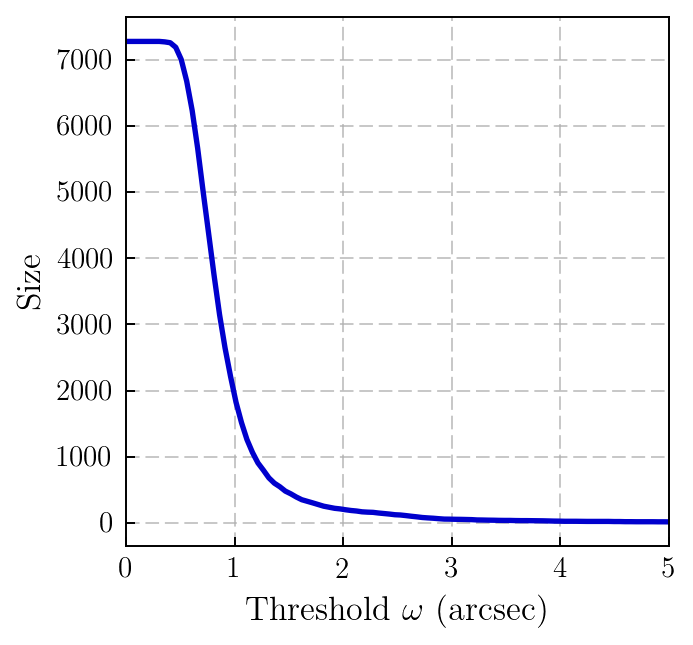

In [134]:
fig = plt.figure(figsize=(4.0,4.0))

plt.plot(omega, sample_size_rad, c='mediumblue', linewidth=2.2)
plt.grid(ls='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=12)
plt.ylabel('Size',fontsize=14)
plt.xlabel('Threshold $\omega$ (arcsec)',fontsize=14)


plt.xlim(0.0,5.0)
plt.show()

This is one of the most effective cuts obviously. Let's plot the same for a range $\omega \in [1.5, 5.0]$ to see more clearly what is going on in that region.

In [135]:
# Range in omega
omega = np.linspace(1.5, 5.0, 200) 
om_size = len(omega)
# =========================================================
# =========================================================
sample_size_rad = np.zeros(om_size)
# =========================================================

for i in range(om_size):
    # Define the cut
    radius_cut = ((FLUX_RADIUS_I_2 > omega[i])&(FLUX_RADIUS_I_2 < 20.0))
    
    # Perform the cut now
    RA_temp = RA_2[radius_cut]

    sample_size_rad[i] = len(RA_temp)

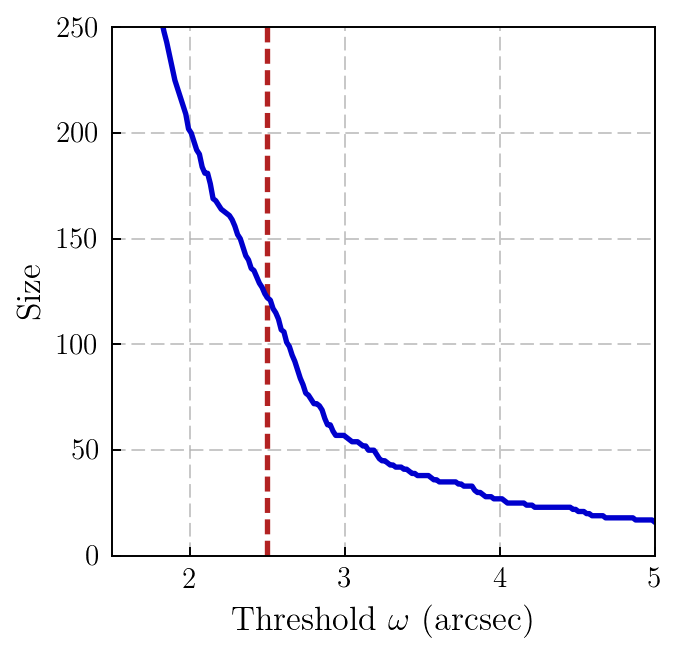

In [136]:
fig = plt.figure(figsize=(4.0,4.0))

plt.plot(omega, sample_size_rad, c='mediumblue', linewidth=2.2)
plt.grid(ls='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=12)
plt.ylabel('Size',fontsize=14)
plt.xlabel('Threshold $\omega$ (arcsec)',fontsize=14)

plt.vlines(2.5,-20.0,250.0, color='firebrick', linestyle='--', linewidth= 2.2)


plt.xlim(1.5,5.0);plt.ylim(0.0,250)
plt.show()

In [137]:
# Define the cut first
radius_cut = ((FLUX_RADIUS_I_2 > 2.5)&(FLUX_RADIUS_I_2 < 20.0))

# =============================================
# =============================================

# Perform the cut now
# =====================================================================
# =====================================================================

# RA and DEC
RA_3 = RA_2[radius_cut]
DEC_3 = DEC_2[radius_cut]

# Image A/ Image B
IMAGE_A_3 = IMAGE_A_2[radius_cut]
IMAGE_B_3 = IMAGE_B_2[radius_cut]

print(len(RA_3))

122


#### A cut on ellipticity

We want also to also exclude objects with very high ellipticity, since this can be a sign of blending with larger objects.

Ellipticity is defined:

\begin{equation}
\epsilon = 1 - \frac{b}{a}
\end{equation}

Perform a cut of the form $\epsilon < 0.6$.

In [138]:
ellipticity = 1.0 - IMAGE_B_3/IMAGE_A_3



In [139]:
ell_cut = (ellipticity < 0.6)

In [140]:
# RA and DEC
RA_4 = RA_3[ell_cut]
DEC_4 = DEC_3[ell_cut]

print(len(RA_4))

116


In [141]:
for i in range(len(RA_4)):
    print i+1, ',', RA_4[i],',',DEC_4[i]

1 , 54.157582 , -34.971806
2 , 54.765113 , -35.653062
3 , 54.119384 , -35.210873
4 , 54.307082 , -35.210512
5 , 54.161742 , -34.968118
6 , 54.391801 , -35.829187
7 , 55.046758 , -35.640978
8 , 54.578228 , -35.530908
9 , 54.843795 , -35.590018
10 , 54.958353 , -35.024597
11 , 54.959801 , -35.017983
12 , 54.117176 , -35.299955
13 , 54.970202 , -35.640255
14 , 54.304445 , -35.721394
15 , 54.958766 , -35.019567
16 , 54.958194 , -35.020454
17 , 54.95944 , -35.018549
18 , 54.958472 , -35.018496
19 , 54.291694 , -35.386664
20 , 54.960016 , -35.01989
21 , 54.961923 , -35.019541
22 , 54.970054 , -35.645186
23 , 54.957115 , -35.022889
24 , 54.249413 , -35.1375
25 , 54.962071 , -35.022725
26 , 54.958825 , -35.02486
27 , 54.224266 , -35.385364
28 , 54.275727 , -34.98302
29 , 54.980735 , -35.662161
30 , 54.422207 , -35.322036
31 , 54.568691 , -35.483409
32 , 55.09821 , -35.268812
33 , 54.756786 , -35.652081
34 , 55.104076 , -35.272446
35 , 54.730617 , -35.738666
36 , 54.675043 , -35.447692
37 , 54.

From the above 116 candidates, after visual inspection I found ~30 (I say approximately 30, because some of them are very faint, so I'm not sure if I should include them and in some other cases the sources I found where a little bit off-centered).

In [142]:
from IPython.display import Image

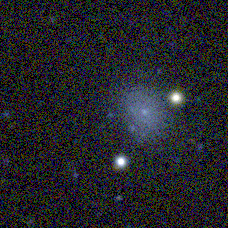

In [143]:
Image(filename='Reg_3_1.png')

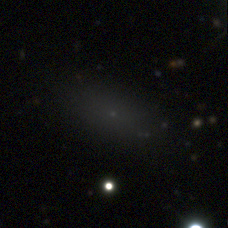

In [144]:
Image(filename='Reg_3_2.png')

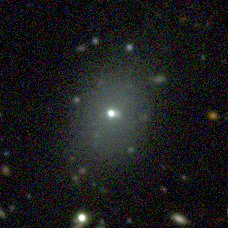

In [145]:
Image(filename='Reg_3_3.png')

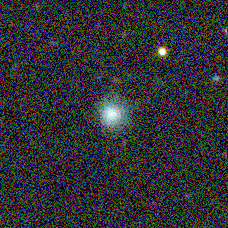

In [146]:
Image(filename='Reg_3_4.png')

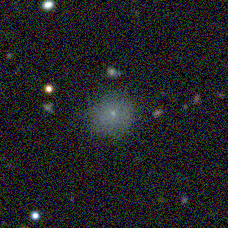

In [147]:
Image(filename='Reg_3_5.png')

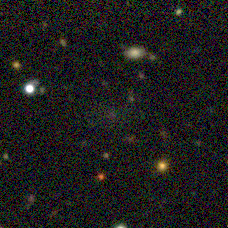

In [148]:
Image(filename='Reg_3_6.png')

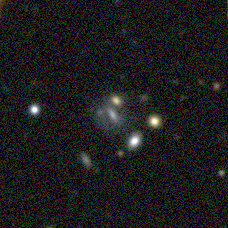

In [149]:
Image(filename='Reg_3_7.png')

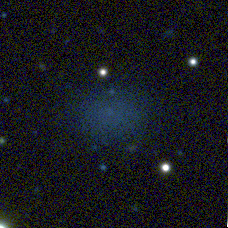

In [150]:
Image(filename='Reg_3_9.png')

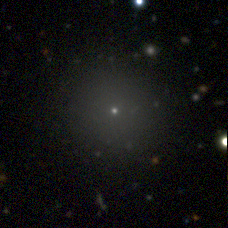

In [151]:
Image(filename='Reg_3_10.png')

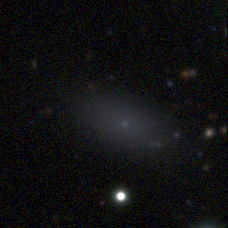

In [152]:
Image(filename='Reg_3_11.png')

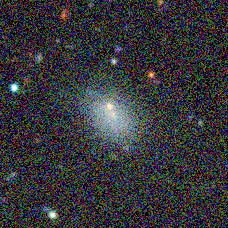

In [153]:
Image(filename='Reg_3_12.png')

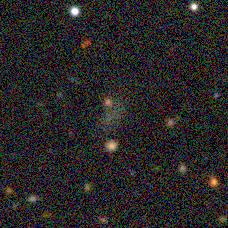

In [154]:
Image(filename='Reg_3_13.png')

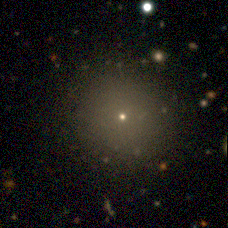

In [155]:
Image(filename='Reg_3_14.png')

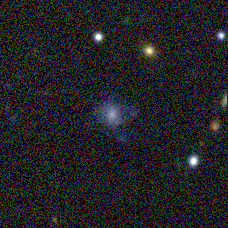

In [156]:
Image(filename='Reg_3_15.png')

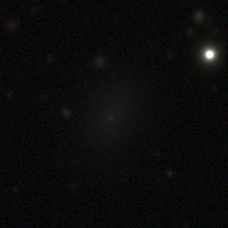

In [157]:
Image(filename='Reg_3_16.png')

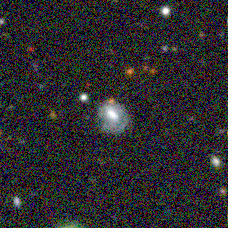

In [158]:
Image(filename='Reg_3_17.png')

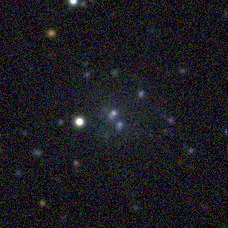

In [159]:
Image(filename='Reg_3_18.png')

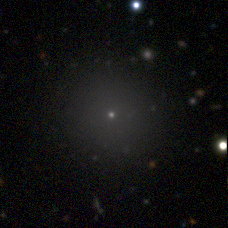

In [160]:
Image(filename='Reg_3_19.png')

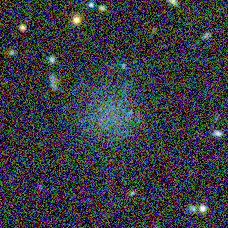

In [161]:
Image(filename='Reg_3_20.png')

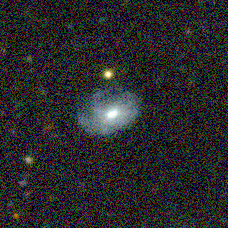

In [162]:
Image(filename='Reg_3_21.png')

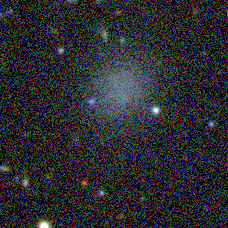

In [163]:
Image(filename='Reg_3_22.png')

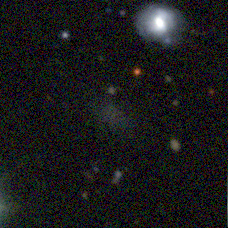

In [164]:
Image(filename='Reg_3_23.png')

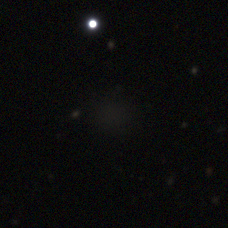

In [165]:
Image(filename='Reg_3_24.png')

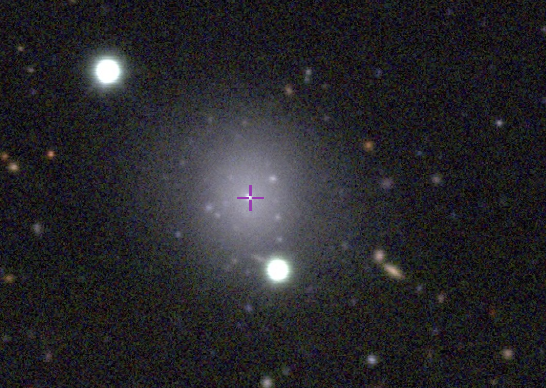

In [166]:
Image(filename='Reg_3_25.png', width=300)

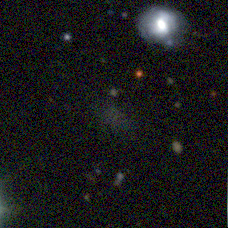

In [167]:
Image(filename='Reg_3_26.png')

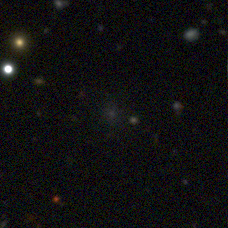

In [168]:
Image(filename='Reg_3_27.png')

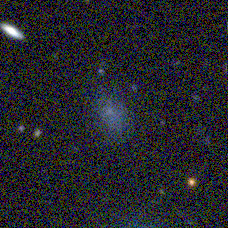

In [169]:
Image(filename='Reg_3_28.png')

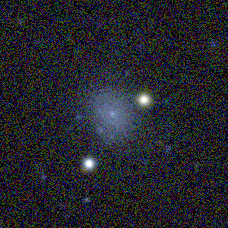

In [170]:
Image(filename='Reg_3_29.png')

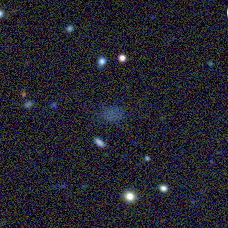

In [171]:
Image(filename='Reg_3_30.png')

##### Compare with the Munoz findindings in the same region

In [172]:
RAh, RAm, RAs, DEd, DEm, DEs =  loadtxt("table1.dat",  unpack=3, usecols=[1,2,3,4,5,6])
print(np.size(RAh))

284


Convert from hours, minutes, secs to degrees, as in DES.

The conversion is:

For DEC:

DEC (degrees) = DEd + DEm/60 + DEs/3600

RA (degrees) = RAh$ \times 15$ + RAm/4 + RAs/240

In [173]:
RA_f = RAh*15.0 + RAm/4.0 + RAs/240.0  # Right ascension in degrees for the Muñoz et. al. objects aroud Fornax
DEC_f = - (abs(DEd) + DEm/60.0 + DEs/3600.0)

Now, keep again only those that are in the region:

\begin{equation}
54.11625 \leq \mbox{RA} \leq 55.11625\\
-35.94833 \leq \mbox{DEC} \leq -34.94833,
\end{equation}

Which is the same region as above.

In [174]:
coord_cut = (RA_f > 54.11625)&(RA_f < 55.11625)&(DEC_f > -35.94833)&(DEC_f < -34.94833)

RA_f_new = RA_f[coord_cut]
DEC_f_new = DEC_f[coord_cut]

print(len(RA_f_new))

72


In [175]:
for i in range(len(RA_f_new)):
    print i+1, ',', RA_f_new[i],',',DEC_f_new[i]

1 , 54.1165 , -35.2108388889
2 , 54.1551666667 , -35.3859083333
3 , 54.160625 , -35.611325
4 , 54.169375 , -35.5889666667
5 , 54.1791666667 , -35.4358027778
6 , 54.1912916667 , -35.9242638889
7 , 54.2081666667 , -34.9485027778
8 , 54.2252916667 , -35.9280222222
9 , 54.2265833333 , -35.7471444444
10 , 54.229125 , -35.9443916667
11 , 54.2382916667 , -35.8365
12 , 54.249 , -35.343
13 , 54.2494166667 , -35.1377
14 , 54.2640833333 , -35.8005861111
15 , 54.26875 , -35.5901833333
16 , 54.275 , -35.342
17 , 54.2915416667 , -35.3866722222
18 , 54.2929166667 , -35.8880944444
19 , 54.315375 , -35.3582416667
20 , 54.3156666667 , -35.7836583333
21 , 54.3245833333 , -35.6992
22 , 54.3328333333 , -35.5216
23 , 54.3917083333 , -35.8292111111
24 , 54.4104166667 , -35.3855
25 , 54.4212083333 , -35.2961472222
26 , 54.4352083333 , -35.7039833333
27 , 54.4422083333 , -35.0527277778
28 , 54.4577916667 , -35.5504388889
29 , 54.462125 , -35.3628805556
30 , 54.52725 , -35.4398833333
31 , 54.5279166667 , -35.59

So, In the same region I have 72 objects from the Munoz catalog, although after inspecting them visually, I find that many of them do not seem to correspond to a visible object in the DES catalog. 